In [120]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy

### Формулировка задачи
Получить уровни энергий в зависимости от параметра зарядового шума $ n_g $ для стационарного ур-ия Шредингера

$$ \left[4E_{C}\left(-i\frac{\mathrm{d}}{\mathrm{d\varphi}} - n_g \right)^2 - E_{J}\cos{\varphi} \right]\psi(\varphi) = E\psi(\varphi) $$

с периодическими г.у.: $ \psi(\varphi) = \psi(\varphi + 2\pi) $


## Решение

Учитывая периодические г.у., наложенные на ВФ, запишем ВФ в представлении ряда Фурье:

$$ \psi(\varphi) = \sum_{n \in \mathbb{Z}} c_{n} e^{in\varphi} $$

Т.к. $ \cos{\varphi} $ также является $ 2 \pi $-периодической ф-ией, то и она раскладывается в ряд Фурье:

$$ \cos{\varphi} = \frac{1}{2} e^{i\varphi} + \frac{1}{2} e^{-i\varphi} $$

Подставим выражения для данных рядов в ур-ие:

$$ \left[4E_{C}\left(-i\frac{\mathrm{d}}{\mathrm{d\varphi}} - n_g \right)^2 - E_{J}\left(\frac{1}{2} e^{i\varphi} + \frac{1}{2} e^{-i\varphi} \right) \right] \sum_{n \in \mathbb{Z}} c_{n} e^{in\varphi} = E \sum_{n \in \mathbb{Z}} c_{n} e^{in\varphi} $$

После преобразований получаем:

$$ \sum_{n \in \mathbb{Z}} c_{n} e^{in\varphi} \left(4 E_{C}n^2 - 8n_g E_C n + 4 n_g^2 E_C - \frac{E_J}{2} e^{i\varphi} - \frac{E_J}{2} e^{i\varphi}  \right) = E \sum_{n \in \mathbb{Z}} c_{n} e^{in\varphi} $$

Далее, домножим ур-ие на $ e^{-im\varphi} $ и проинтегрируем по периоду: 

$$ \int_{0}^{2\pi} \mathrm{d\varphi} \sum_{n \in \mathbb{Z}} c_{n} e^{i(n-m)\varphi} \left(4 E_{C}n^2 - 8n_g E_C n + 4 n_g^2 E_C - \frac{E_J}{2} e^{i\varphi} - \frac{E_J}{2} e^{i\varphi}  \right) = \int_{0}^{2\pi} \mathrm{d\varphi} E \sum_{n \in \mathbb{Z}} c_{n} e^{i(n-m)\varphi} $$

Т.к. $ \int_{0}^{2\pi} \mathrm{d\varphi} e^{i(n-m)\varphi} = 2 \pi \delta_{n}^{m} $, то:

$$ \sum_{n \in \mathbb{Z}} c_n \left( \delta_{n}^{m} \left(4E_C n^2 - 8n n_g E_C + 4 n_g^2 E_C \right) - \delta_{n}^{m-1} \frac{E_J}{2} - \delta_{n}^{m+1} \frac{E_J}{2} \right) = E \sum_{n \in \mathbb{Z}} c_n \delta_{n}^{m} $$

Получаем задачу на собственные значения энергии E:

$$ c_m \left(4E_C m^2 - 8m n_g E_C + 4 n_g^2 E_C \right) - \frac{E_J}{2} (c_{m+1} + c_{m-1}) = E c_m $$

Здесь $ c_m $ - компоненты вектора (бесконечного) из коэффициентов ряда Фурье решения СУШ. Переобозначим:

$$ \left( \hat{D}(n_g) + \hat{A} \right) \vec{c} = F[\hat{H}]\vec{c} = E \vec{c} $$

Здесь: $ \hat{D}(n_g) $ - диагональная часть матрицы (бесконечной), $ \hat{A} $ - недиагональная, $ F[\hat{H}] $ - гамильтониан для задачи в терминах коэффициентов Фурье.

Решение такого ур-ия будет соответствовать точному решению СУШ, однако решить такую задачу численно не представляется возможным. 

### Численной решение приближенной задачи

Чтобы решить такую задачу численно, необходимо выбрать максимальный номер коэффициента $ M $ в разложении решения в ряд Фурье. Таким образом, полученным уравнением мы будем описывать систему не вполне точно, однако в силу того, что коэффициенты ряда Фурье убывают с ростом номера, увеличивая $ M $, мы будем увеличивать точность описания системы.

Пусть $ \tilde{\psi}_M(\varphi) $ - приближенное решение СУШ такое, что в разложении в ряд Фурье для коэффициентов верно утверждение:

$$ \forall m: |m| > M \rightarrow \tilde{c}_m = 0 $$

Для такого приближенного решения вектор $ \vec{\tilde{c}} $ будет иметь конечное число ненулевых значений, и тогда секулярное ур-ие можно переписать в матричном виде:

$$ (D(n_g) + A)\vec{\tilde{c}} = F[\tilde{H}] \vec{\tilde{c}} = E \vec{\tilde{c}} $$

Теперь можем получить численное решения сформулированного выше СУШ.

Примечание: выбирая число $ M $, мы фиксируем размерность задачи - $ 2M+1 $.  

### Численная симуляция трансмона и получение уровней энергии в зависимости от зарядового шума

In [129]:
M = 20   # maximum number of non-zero Fourier coefficient
dimension = 2 * M + 1   # dimension of the task

def diag(n_g, M, E_C, E_J):
    '''
    Diagonal part of Hamiltonian, which depends on charge noise and M
    '''
    matrix = np.zeros((dimension, dimension))
    for i in range(dimension):
        matrix[i,i] = 4 * E_C * (i-M)**2 - 8 * (i-M) * n_g * E_C + 4 * n_g**2 * E_C
    return matrix


def non_diag(M, E_J):
    '''
    Non-diagonal part of Hamiltonian
    '''
    matrix = np.zeros((dimension, dimension))
    for i in range(dimension):
        if (i == 0):
            matrix[i,i+1] = 1 
        elif (i == dimension - 1):
            matrix[i,i-1] = 1
        else:
            matrix[i,i-1], matrix[i,i+1] = 1, 1
    return (-E_J / 2) * matrix


def energy_levels(M, n_g, E_C, E_J):
    '''
    Accepted energy levels
    '''
    H = diag(n_g, M, E_C, E_J) + non_diag(M, E_J)
    E = np.linalg.eigvals(H)
    return sorted(E)

In [133]:
N = 100
grid = np.linspace(-2, 2, N)   # grid of charge noise values

num_branches = 3

def branches(ratio):
    E_C = 1
    E_J = ratio * E_C
    br = [[] for i in range(num_branches)]
    for n_g in grid:
        E = energy_levels(M, n_g, E_C, E_J)
        for i in range(num_branches):
            br[i].append(E[i]) 
    return br

In [134]:
ratios = [1,5,10,50]
E01 = [energy_levels(M, 1/2, 1, r)[1] - energy_levels(M, 1/2, 1, r)[0] for r in ratios] 

branches_sets = [branches(r) for r in ratios]

# data scaling
for i in range(len(ratios)):
    m = min(branches_sets[i][0])
    for k in range(num_branches):
        for j in range(N):
            branches_sets[i][k][j] = (branches_sets[i][k][j] - m) / E01[i]

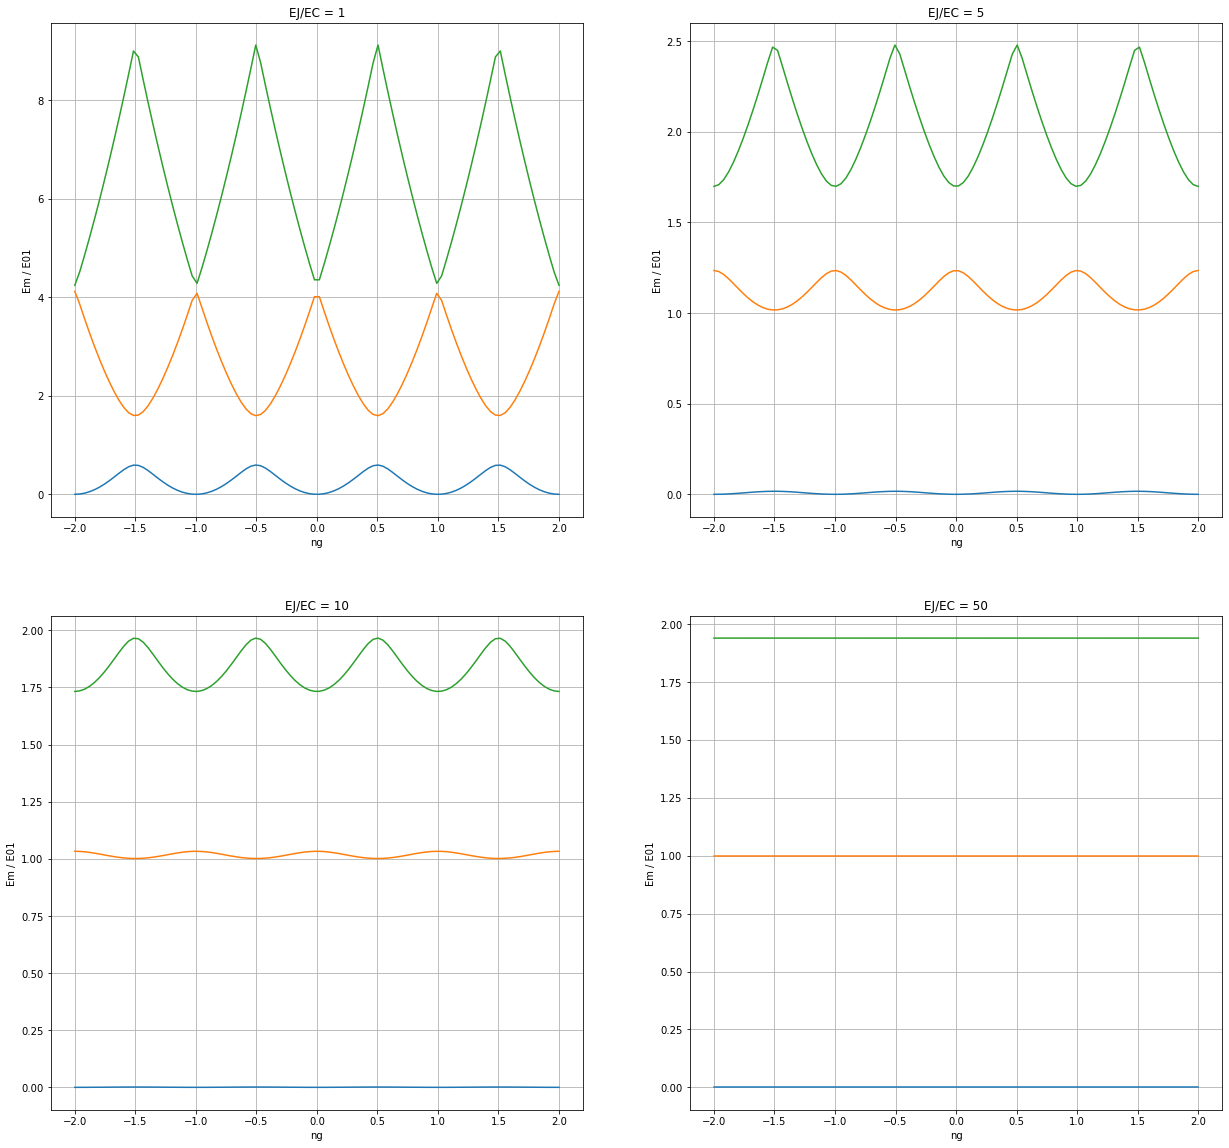

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(21,20))

for ax in axs.flat:
    ax.set(xlabel='ng', ylabel='Em / E01')
    ax.grid()

axs[0,0].set_title('EJ/EC = 1')
axs[0,1].set_title('EJ/EC = 5')
axs[1,0].set_title('EJ/EC = 10')
axs[1,1].set_title('EJ/EC = 50')
    
for i in range(num_branches):
    axs[0,0].plot(grid, branches_sets[0][i])
    axs[0,1].plot(grid, branches_sets[1][i])
    axs[1,0].plot(grid, branches_sets[2][i])
    axs[1,1].plot(grid, branches_sets[3][i])

### Энергии переходов

Найдем энергии переходов для соотношений $ E_{J}/E_{C} = 1 $ и $ E_{J}/E_{C} = 50 $.

In [136]:
Nc = 100
cgrid = np.linspace(0.1,20,Nc)


def transition_energies_grid(ratio):
    egrid = np.zeros((Nc))
    for i in range(Nc):
        egrid[i] = energy_levels(M, 1/2, cgrid[i], ratio)[1] - energy_levels(M, 1/2, cgrid[i], ratio)[0]
    return egrid

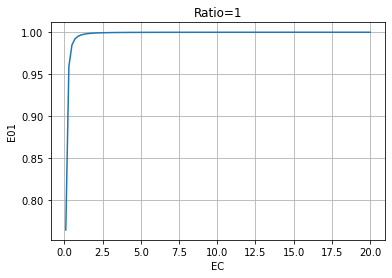

In [137]:
plt.grid()
plt.title('Ratio=1')
plt.xlabel('EC')
plt.ylabel('E01')
plt.plot(cgrid, transition_energies_grid(1))

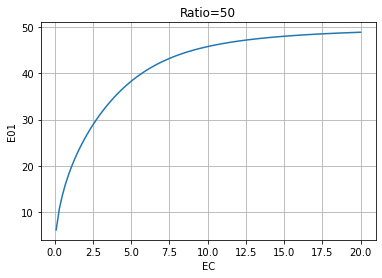

In [119]:
plt.grid()
plt.title('Ratio=50')
plt.xlabel('EC')
plt.ylabel('E01')
plt.plot(cgrid, transition_energies_grid(50))

Как видим, энергия перехода от 0-ого к 1-ому уровням экспоненциально стремится к некоторому фиксированному значению